In [1]:
# Import dependencies

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
pd.set_option('max_colwidth', None)

In [2]:
# Loading the dataset

df=pd.read_csv("../marketing /marketing_campaign.csv", sep='\t' )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

### In this section I will clean the dataset.Let us have a look at the information in data.

* Data Cleaning
* Feature Engineering

In [3]:
print(f'Dataset size: {df.shape}')

Dataset size: (2240, 29)


In [4]:
#Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we can note that:
* There are missing values in income

First of all, for the missing values , I am going to drop the rows that have missing income values.

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#To remove the NA values

df=df.dropna()
print(f'The total number of data after removing the rows with missing values are:', len(df))

The total number of data after removing the rows with missing values are: 2216


In [7]:
# Find a newest and oldest recorded customers 

df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])
dates=[]
for i in df["Dt_Customer"]:
    i=i.date()
    dates.append(i)
print(f'The newest customers enrolment date in the records:', max(dates))
print(f'The oldest customers enrolment date in the records:', min(dates))

The newest customers enrolment date in the records: 2014-12-06
The oldest customers enrolment date in the records: 2012-01-08


/var/folders/5c/91vy87lj6jn5w2_2n9dq467m0000gn/T/ipykernel_4084/2286121985.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])


In [8]:
#Find a marital status

print(f'Total categories in the feature marital status:\n', df["Marital_Status"].value_counts())

Total categories in the feature marital status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [9]:
#Find a Education status 

print(f'Total categories in the feature Education:\n', df["Education"].value_counts())

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# The following steps to engineer some new features:
Age, Education, Marital status, Family number, Products, Promotion

In [10]:
#Feature Engineering
#Age of customer today 

df["Age"]= datetime.now().year- df["Year_Birth"]

#Replace to education levels in three groups

df["Education"]=df["Education"].replace({"Basic":  "Undergraduate", "2n Cycle" : "Undergraduate",
                                         "Graduation" : "Graduate", "Master": "PostGraduate", "PhD": "PostGraduate"})

#Marital status

df["Living_With"]= df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", 
                                                 "Single": "Alone", "Divorced": "Alone",
                                                 "Widow":"Alone", "Alone": "Alone", 
                                                 "YOLO":"Alone", "Absurd": "Alone"
                                                 })
#Total children living in the household
df["Children"]= df["Teenhome"] + df["Kidhome"]

#Total members in the household

df["Family_Size"]=df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Total spendind for the products
df["Expenses"]= df["MntFishProducts"]+ df["MntFruits"]+ df["MntGoldProds"]+ df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"]

df.rename(columns= {"MntFishProducts": "Fish", "MntFruits": "Fruit", "MntGoldProds": "Gold", 
                    "MntMeatProducts": "Meat", "MntSweetProducts": "Sweet", "MntWines": "Wines"}, inplace=True)

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

df=df.drop(["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Z_CostContact", "Z_Revenue","Dt_Customer",
            "AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "NumWebPurchases", 
            "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"], axis=1)

df

,Education,Income,Recency,Wines,Fruit,Meat,Fish,Sweet,Gold,NumWebVisitsMonth,Complain,Response,Age,Living_With,Children,Family_Size,Is_Parent,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Graduate,58138.0,58,635,88,546,172,88,88,7,0,1,66,Alone,0,1,0,1617,0,25
1,Graduate,46344.0,38,11,1,6,2,1,6,5,0,0,69,Alone,2,3,1,27,0,6
2,Graduate,71613.0,26,426,49,127,111,21,42,4,0,0,58,Partner,0,2,0,776,0,21
3,Graduate,26646.0,26,11,4,20,10,3,5,6,0,0,39,Partner,1,3,1,53,0,8
4,PostGraduate,58293.0,94,173,43,118,46,27,15,5,0,0,42,Partner,1,3,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,709,43,182,42,118,247,5,0,0,56,Partner,1,3,1,1341,0,18
2236,PostGraduate,64014.0,56,406,0,30,0,0,8,7,0,0,77,Partner,3,5,1,444,1,22
2237,Graduate,56981.0,91,908,48,217,32,12,24,6,0,0,42,Alone,0,1,0,1241,1,19
2238,PostGraduate,69245.0,8,428,30,214,80,30,61,3,0,0,67,Partner,1,3,1,843,0,23


In [12]:
df.describe()

,Income,Recency,Wines,Fruit,Meat,Fish,Sweet,Gold,NumWebVisitsMonth,Complain,Response,Age,Children,Family_Size,Is_Parent,Expenses,TotalAcceptedCmp,NumTotalPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,5.319043,0.009477,0.150271,54.179603,0.947202,2.592509,0.714350,607.075361,0.298285,14.880866
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.425359,0.096907,0.357417,11.985554,0.749062,0.905722,0.451825,602.900476,0.679209,7.670957
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,0.000000,46.000000,0.000000,2.000000,0.000000,69.000000,0.000000,8.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,6.000000,0.000000,0.000000,53.000000,1.000000,3.000000,1.000000,396.500000,0.000000,15.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,7.000000,0.000000,0.000000,64.000000,1.000000,3.000000,1.000000,1048.000000,0.000000,21.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,20.000000,1.000000,1.000000,130.000000,3.000000,5.000000,1.000000,2525.000000,4.000000,44.000000


# Let's look at EDA:

In [13]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


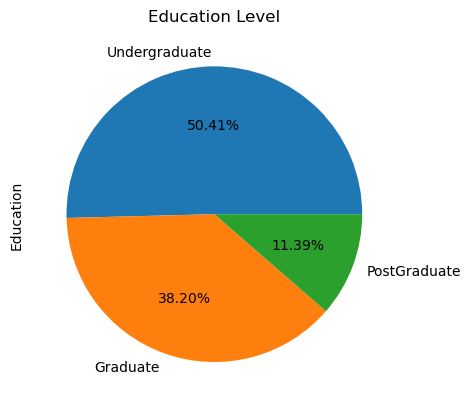

In [19]:
#Pie chart of education 

df_education= df["Education"].value_counts()
labels=["Undergraduate", "Graduate", "PostGraduate", ]
df_education.plot(kind='pie' , x= df_education, labels=labels, autopct='%2.2f%%')
plt.title('Education Level')
plt.show()

On this pie chart we can see that the highest level of customers's education is undergraduate.

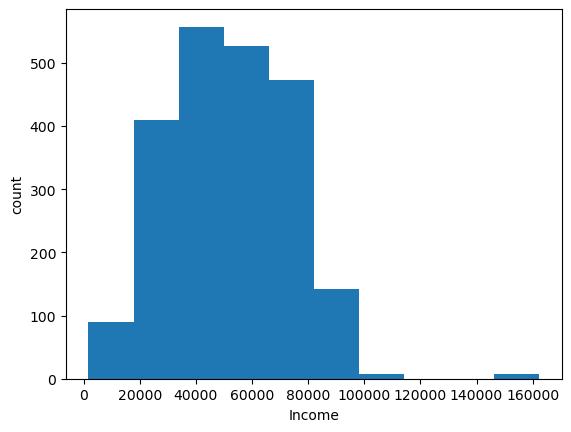

In [50]:
# Histogram of Income
income=df["Income"]
plt.hist(income)
plt.xlabel('Income')
plt.ylabel("count")
plt.show()

On this histogram chart the average income is $50000 per annual. 

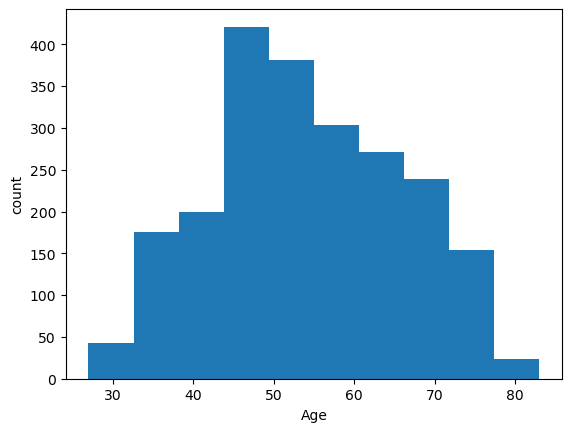

In [49]:
#Histogram of Age
age=df["Age"]
plt.hist(age)
plt.xlabel('Age')
plt.ylabel("count")
plt.show()

On this chart the average of customers age is 52. 

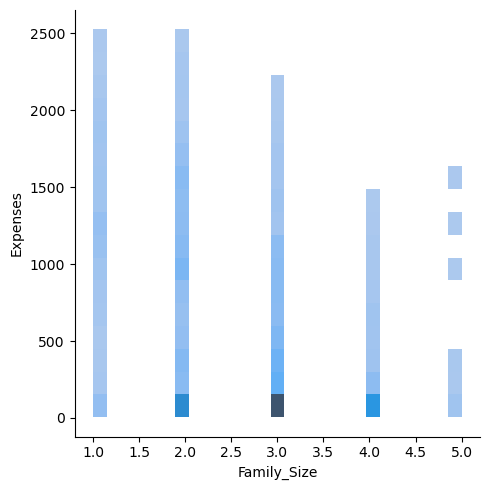

In [43]:
sns.displot(x= df["Family_Size"], y= df["Expenses"])

/var/folders/5c/91vy87lj6jn5w2_2n9dq467m0000gn/T/ipykernel_4084/2080480023.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df.corr()


<Axes: >

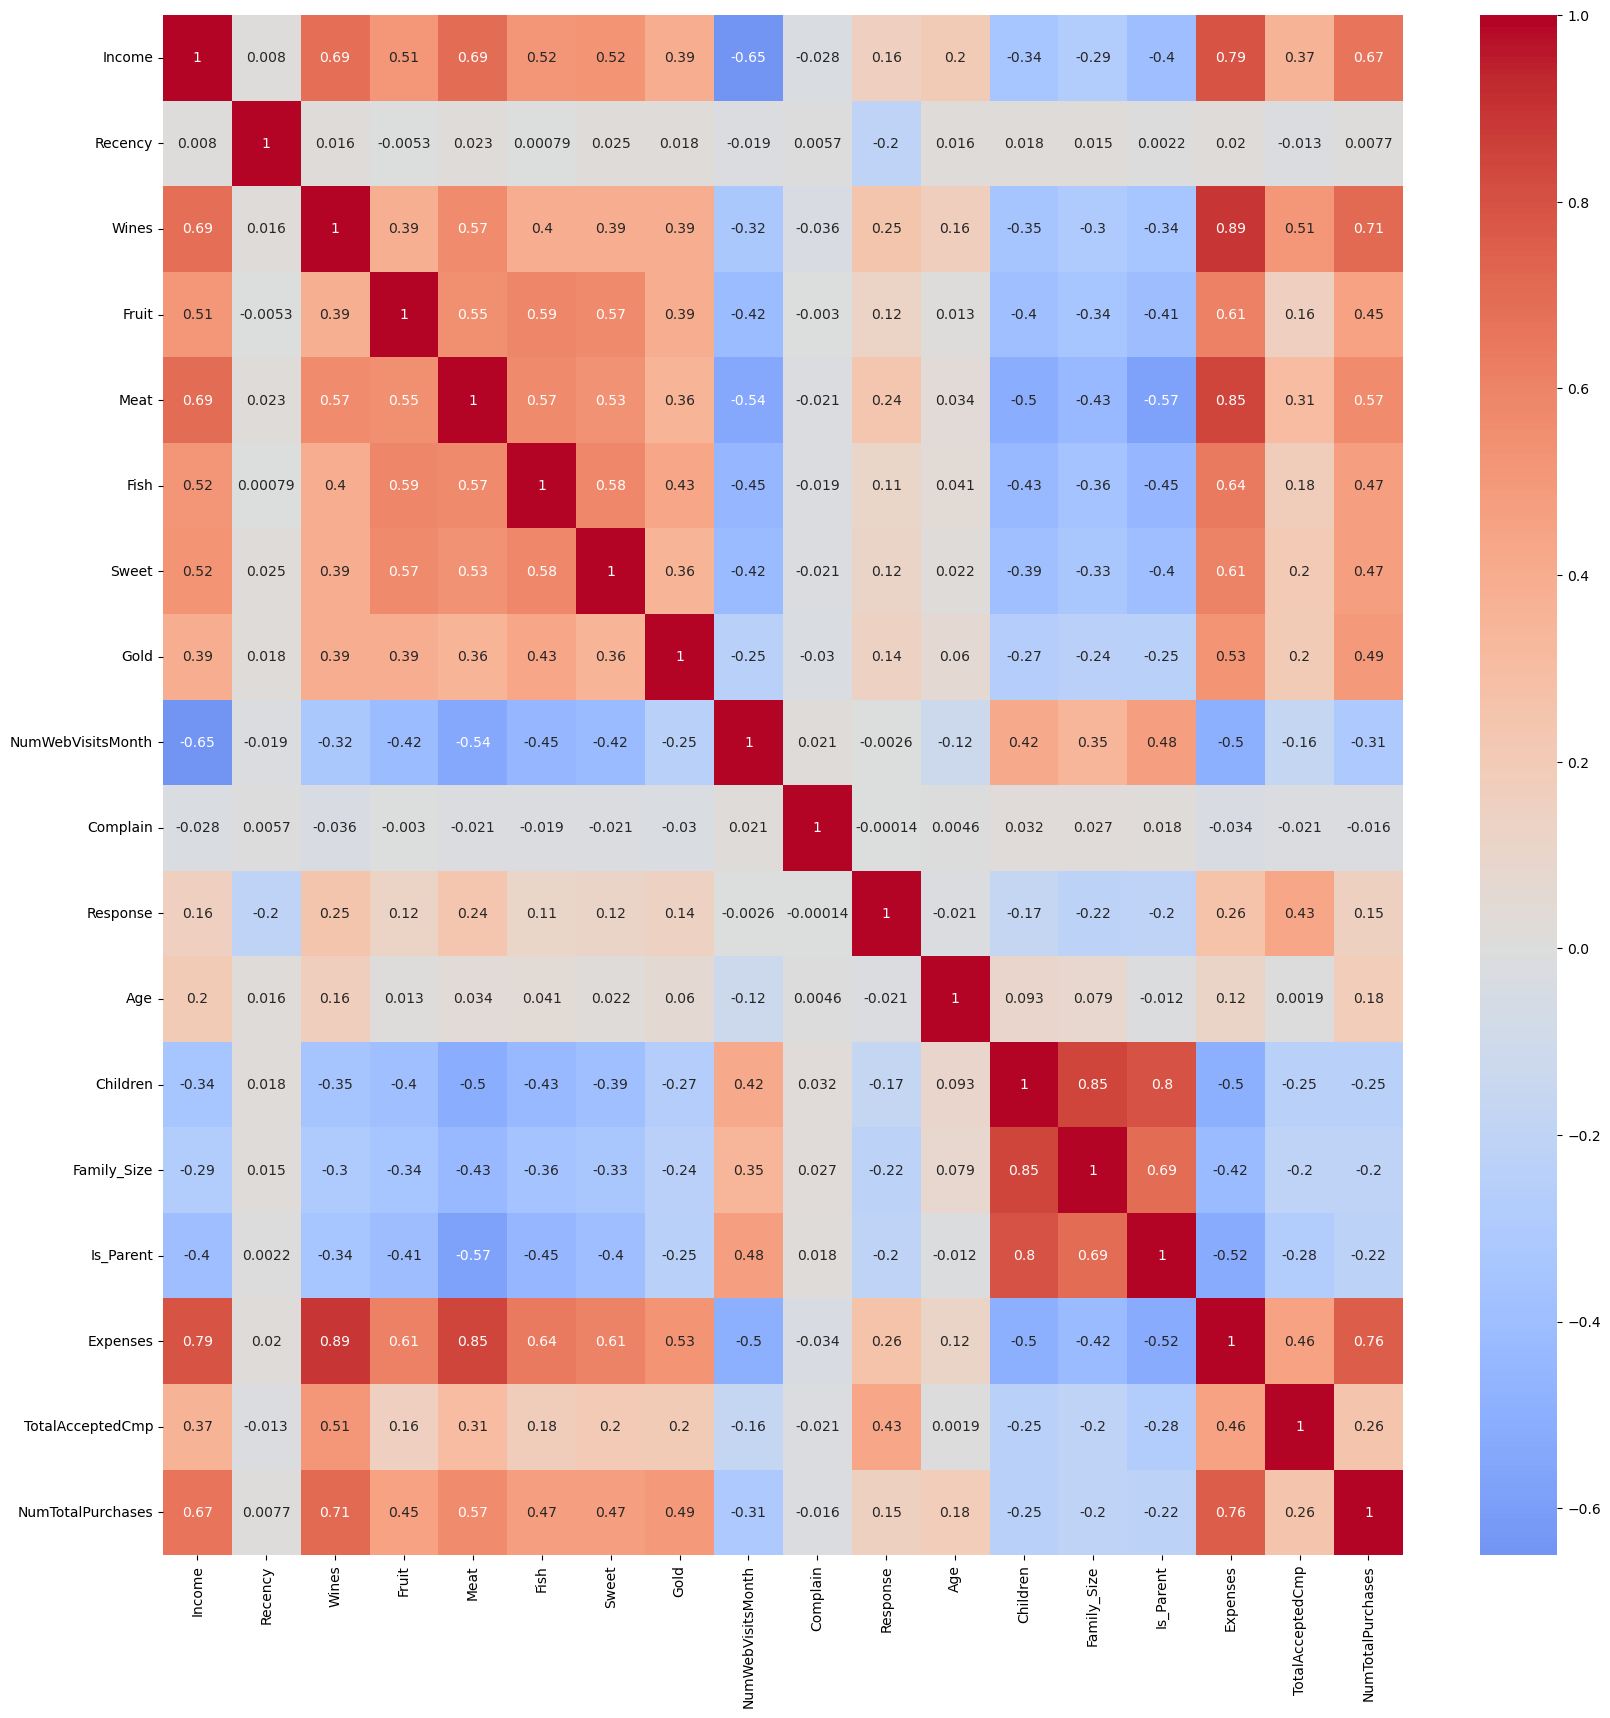

In [38]:
# correlation matrix 

corr_matrix= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', center=0)

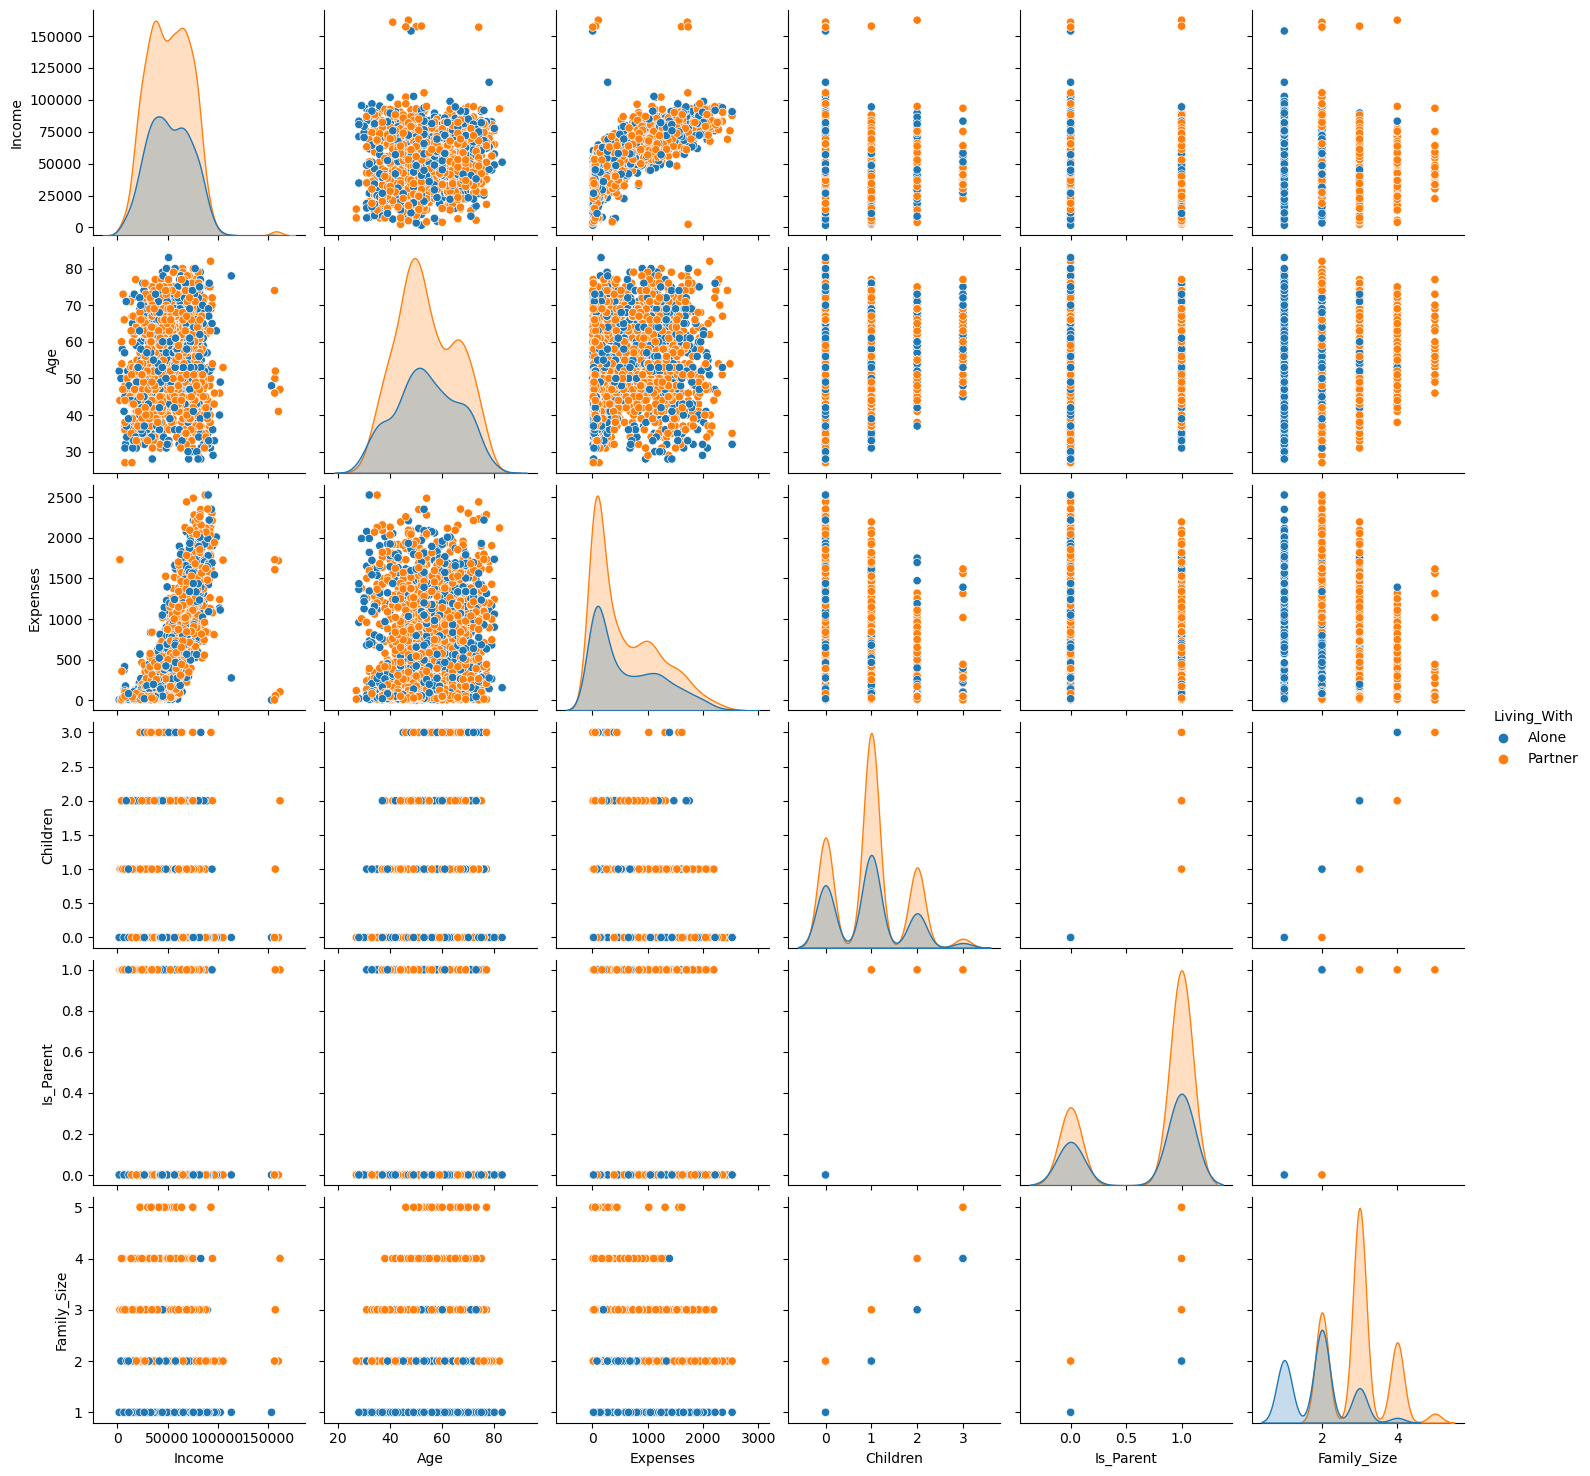

In [16]:
to_plot=["Income", "Age", "Expenses", "Children", "Is_Parent", "Family_Size", "Living_With"]
sns.pairplot(df[to_plot], hue="Living_With")
plt.show()